In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import pycountry_convert as pc
from geopy import geocoders

do not run again

In [56]:
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 8.8 MB/s eta 0:00:0000:0100:01m


In [167]:
data_folder = "data/ultimate_tennis_matches_dataset/"

year = "2024"
ultimate_2024 = pd.read_excel(data_folder + year + ".xlsx") 

#ultimate_2024_filtered = ultimate_2024[['Date', 'Court', 'Surface', 'Winner', 'Loser', 'Location', 'Round', 'WRank', 'WPts']]

ultimate_2024_filtered = ultimate_2024[['Date', 'Surface', 'Winner', 'Location']]

print(ultimate_2024_filtered.head())

        Date Surface         Winner  Location
0 2023-12-31    Hard     Popyrin A.  Brisbane
1 2023-12-31    Hard  Shevchenko A.  Brisbane
2 2024-01-01    Hard   Safiullin R.  Brisbane
3 2024-01-01    Hard        Rune H.  Brisbane
4 2024-01-01    Hard    Dimitrov G.  Brisbane


In [168]:
# Count the number of wins per surface for each winner
surface_counts = ultimate_2024_filtered.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)

# Rename columns
surface_counts = surface_counts.rename(columns={'Hard': 'Hard Wins', 'Grass': 'Grass Wins', 'Clay': 'Clay Wins'})

# Display the results
print(surface_counts)

Surface       Clay Wins  Grass Wins  Hard Wins
Winner                                        
Ajdukovic D.          3           0          0
Albot R.              1           0          2
Alcaraz C.           12           8         24
Altmaier D.           4           1          7
Arnaldi M.            8           1         17
...                 ...         ...        ...
Zeppieri G.           1           0          1
Zhang Zh.             9           4         10
Zhou Y.               0           0          2
Zhukayev B.           0           0          2
Zverev A.            20           6         35

[211 rows x 3 columns]


In [169]:
# Find the top player on each surface
best_grass = surface_counts['Grass Wins'].idxmax()
best_clay = surface_counts['Clay Wins'].idxmax()
best_hard = surface_counts['Hard Wins'].idxmax()

# Print the results
print(f"Best Grass Court Player: {best_grass} with {surface_counts.loc[best_grass, 'Grass Wins']} wins")
print(f"Best Clay Court Player: {best_clay} with {surface_counts.loc[best_clay, 'Clay Wins']} wins")
print(f"Best Hard Court Player: {best_hard} with {surface_counts.loc[best_hard, 'Hard Wins']} wins")

Best Grass Court Player: Musetti L. with 12 wins
Best Clay Court Player: Baez S. with 23 wins
Best Hard Court Player: Sinner J. with 51 wins


# Top 5 best players for each surface in 2024

to do for every year : just change the dataset :)


/var/folders/rs/m0jyf0ys4hd2n2ny339zvn5r0000gn/T/ipykernel_31443/2515171442.py:31: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout(h_pad=2)
/Users/luna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


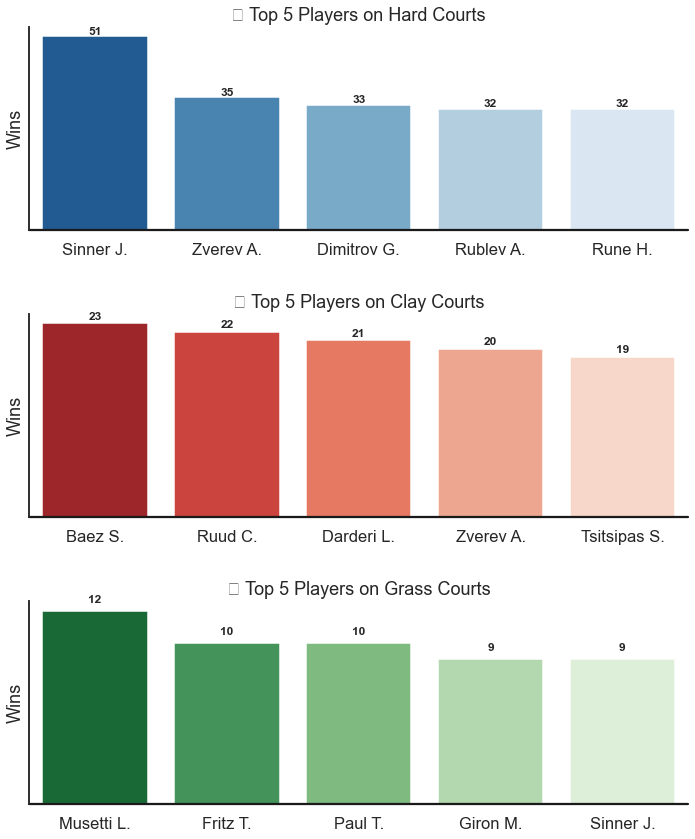

In [170]:
sns.set_theme(style="white", context="talk")

# Find the top 5 players for each surface
top_hard = surface_counts[['Hard Wins']].nlargest(5, 'Hard Wins').reset_index()
top_clay = surface_counts[['Clay Wins']].nlargest(5, 'Clay Wins').reset_index()
top_grass = surface_counts[['Grass Wins']].nlargest(5, 'Grass Wins').reset_index()

# Set up the matplotlib figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Function to add annotations
def add_annotations(ax, data, column):
    for i, v in enumerate(data[column]):
        ax.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold')
        
def set_plot(index, surface, top_surface, palette): 
    axe = sns.barplot(x='Winner', y=f'{surface} Wins', data=top_surface, palette=palette, ax=axes[index])
    axes[index].set_title(f"🏆 Top 5 Players on {surface} Courts")
    axes[index].set_ylabel("Wins")
    axes[index].set_xlabel("")
    axes[index].axhline(0, color="k", clip_on=False)
    add_annotations(axe, top_surface, f'{surface} Wins')
    
set_plot(0, "Hard", top_hard, "Blues_r")
set_plot(1, "Clay", top_clay, "Reds_r")
set_plot(2, "Grass", top_grass, "Greens_r")

# Improve spacing and layout
sns.despine(bottom=True)
plt.setp(fig.axes, yticks=[])
plt.tight_layout(h_pad=2)

# Show the plots
plt.show()


In [171]:

import time 
locations = ultimate_2024['Location'].unique()
print(locations)

# Search continent for each city
# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to get continent
def get_continent(city):
    time.sleep(1)
    try:
        location = geolocator.geocode(city, featuretype='city', language="en")  # Get location details
        country_code = location.address.split(",")[-1].strip()  # Extract country code
        continent_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country_code))
        return continent_code
    except:
        return "Unknown"
    
# Create a mapping of cities to continents
continent_mapping = {city: get_continent(city) for city in locations}

# Ensure we're modifying a copy of the DataFrame
ultimate_2024_filtered = ultimate_2024_filtered.copy()

# Apply mapping to the dataset safely
ultimate_2024_filtered.loc[:, 'Continent'] = ultimate_2024_filtered['Location'].map(continent_mapping)

# Display updated DataFrame
print(ultimate_2024_filtered[['Location', 'Continent']].drop_duplicates())

['Brisbane' 'Hong Kong' 'Adelaide' 'Auckland' 'Melbourne' 'Montpellier'
 'Cordoba' 'Dallas' 'Marseille' 'Buenos Aires' 'Delray Beach' 'Rotterdam'
 'Doha' 'Los Cabos' 'Rio de Janeiro' 'Acapulco' 'Dubai ' 'Santiago'
 'Indian Wells' 'Miami' 'Estoril' 'Houston' 'Marrakech' 'Monte Carlo'
 'Barcelona' 'Bucharest' 'Munich' 'Madrid' 'Rome' 'Geneva' 'Lyon' 'Paris'
 'Stuttgart' "'s-Hertogenbosch" 'Halle' 'Queens Club' 'Eastbourne'
 'Mallorca' 'London' 'Bastad' 'Gstaad' 'Hamburg' 'Newport' 'Atlanta'
 'Kitzbuhel' 'Umag' 'Washington' 'Montreal' 'Cincinnati' 'Winston-Salem'
 'New York' 'Chengdu' 'Hangzhou' 'Beijing' 'Tokyo' 'Shanghai' 'Almaty'
 'Antwerp' 'Stockholm' 'Basel' 'Vienna' 'Belgrade' 'Metz' 'Turin']
       Location Continent
0      Brisbane        OC
31    Hong Kong        AS
58     Adelaide        OC
85     Auckland        OC
112   Melbourne        OC
...         ...       ...
2517      Basel        EU
2548     Vienna        EU
2634   Belgrade        EU
2661       Metz        EU
2688     

In [172]:
print(continent_mapping)
print(ultimate_2024_filtered[['Continent']].drop_duplicates())

{'Brisbane': 'OC', 'Hong Kong': 'AS', 'Adelaide': 'OC', 'Auckland': 'OC', 'Melbourne': 'OC', 'Montpellier': 'EU', 'Cordoba': 'SA', 'Dallas': 'NA', 'Marseille': 'EU', 'Buenos Aires': 'SA', 'Delray Beach': 'NA', 'Rotterdam': 'EU', 'Doha': 'AS', 'Los Cabos': 'Unknown', 'Rio de Janeiro': 'SA', 'Acapulco': 'NA', 'Dubai ': 'AS', 'Santiago': 'NA', 'Indian Wells': 'NA', 'Miami': 'NA', 'Estoril': 'Unknown', 'Houston': 'NA', 'Marrakech': 'AF', 'Monte Carlo': 'SA', 'Barcelona': 'EU', 'Bucharest': 'EU', 'Munich': 'EU', 'Madrid': 'EU', 'Rome': 'EU', 'Geneva': 'EU', 'Lyon': 'EU', 'Paris': 'EU', 'Stuttgart': 'EU', "'s-Hertogenbosch": 'EU', 'Halle': 'EU', 'Queens Club': 'Unknown', 'Eastbourne': 'EU', 'Mallorca': 'Unknown', 'London': 'EU', 'Bastad': 'EU', 'Gstaad': 'EU', 'Hamburg': 'EU', 'Newport': 'NA', 'Atlanta': 'NA', 'Kitzbuhel': 'EU', 'Umag': 'EU', 'Washington': 'NA', 'Montreal': 'NA', 'Cincinnati': 'NA', 'Winston-Salem': 'NA', 'New York': 'NA', 'Chengdu': 'AS', 'Hangzhou': 'AS', 'Beijing': 'AS', 

In [173]:
# Create a dictionary to store results
city_results = {}
continent_results = {}

# Get unique locations
unique_cities = ultimate_2024_filtered['Location'].unique()
unique_continents = ultimate_2024_filtered['Continent'].unique()

# Loop over each city
for city in unique_cities:
    # Create a subset for the city
    city_df = ultimate_2024[ultimate_2024['Location'] == city]

    # Compute wins by surface for this city
    city_surface_counts = city_df.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)

    # Store results in dictionary
    city_results[city] = city_surface_counts
    
    # Print results for each city
    print(f"City: {city}")
    #print(city_surface_counts)
    if 'Grass' in city_surface_counts: 
        best_grass = city_surface_counts['Grass'].idxmax()
        print(f"🎾 Best Grass Court Player in {city} 🎾: {best_grass} with {city_surface_counts.loc[best_grass, 'Grass']} wins")

    if 'Clay' in city_surface_counts: 
        best_clay = city_surface_counts['Clay'].idxmax()
        print(f"🎾 Best Clay Court Player in {city} 🎾: {best_clay} with {city_surface_counts.loc[best_clay, 'Clay']} wins")

    if 'Hard' in city_surface_counts: 
        best_hard = city_surface_counts['Hard'].idxmax()
        print(f"🎾 Best Hard Court Player in {city} 🎾: {best_hard} with {city_surface_counts.loc[best_hard, 'Hard']} wins")
    
    print("="*40)

City: Brisbane
🎾 Best Hard Court Player in Brisbane 🎾: Dimitrov G. with 5 wins
City: Hong Kong
🎾 Best Hard Court Player in Hong Kong 🎾: Rublev A. with 4 wins
City: Adelaide
🎾 Best Hard Court Player in Adelaide 🎾: Lehecka J. with 5 wins
City: Auckland
🎾 Best Hard Court Player in Auckland 🎾: Tabilo A. with 5 wins
City: Melbourne
🎾 Best Hard Court Player in Melbourne 🎾: Sinner J. with 7 wins
City: Montpellier
🎾 Best Hard Court Player in Montpellier 🎾: Bublik A. with 4 wins
City: Cordoba
🎾 Best Clay Court Player in Cordoba 🎾: Darderi L. with 5 wins
City: Dallas
🎾 Best Hard Court Player in Dallas 🎾: Giron M. with 4 wins
City: Marseille
🎾 Best Hard Court Player in Marseille 🎾: Humbert U. with 4 wins
City: Buenos Aires
🎾 Best Clay Court Player in Buenos Aires 🎾: Diaz Acosta F. with 5 wins
City: Delray Beach
🎾 Best Hard Court Player in Delray Beach 🎾: Fritz T. with 4 wins
City: Rotterdam
🎾 Best Hard Court Player in Rotterdam 🎾: Sinner J. with 5 wins
City: Doha
🎾 Best Hard Court Player in Doha 

In [174]:
# Dictionary to store top players per continent
top_players = []

for city in unique_cities:
    if continent == "Unknown":
        continue

    # Filter DataFrame for this continent
    city_df = ultimate_2024[ultimate_2024['Location'] == city]

    # Compute total wins per player
    total_wins = city_df.groupby('Winner').size().reset_index(name='Total Wins')

    # Get the top 5 players for the continent
    top_5_players = total_wins.nlargest(5, 'Total Wins')['Winner']

    # Compute wins by surface for only these top 5 players
    city_surface_counts = (
        city_df[city_df['Winner'].isin(top_5_players)]
        .groupby(['Winner', 'Surface'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )

    # Convert to long format for Seaborn
    city_melted = city_surface_counts.melt(id_vars=['Winner'], var_name='Surface', value_name='Wins')
    city_melted['Location'] = city  # Add continent column

    # Append to results list
    top_players.append(city_melted)
    
print(top_players_df)

                Winner Surface  Wins Continent
0          Dimitrov G.    Hard     7        OC
1          Djokovic N.    Hard     5        OC
2           Lehecka J.    Hard     6        OC
3          Medvedev D.    Hard     6        OC
4            Sinner J.    Hard     7        OC
5           Humbert U.    Hard    11        AS
6         Khachanov K.    Hard    11        AS
7          Medvedev D.    Hard     9        AS
8            Rublev A.    Hard    10        AS
9            Sinner J.    Hard    10        AS
10        De Minaur A.    Clay     7        EU
11            Fritz T.    Clay    13        EU
12             Rune H.    Clay     9        EU
13           Sinner J.    Clay     8        EU
14           Zverev A.    Clay    19        EU
15        De Minaur A.   Grass     8        EU
16            Fritz T.   Grass     8        EU
17             Rune H.   Grass     3        EU
18           Sinner J.   Grass     9        EU
19           Zverev A.   Grass     6        EU
20        De 

In [176]:
# Dictionary to store top players per surface per continent
top_grass_players = []
top_clay_players = []
top_hard_players = []

# Loop through each continent (excluding "Unknown")
for city in unique_cities:

    # Filter DataFrame for this continent
    city_df = ultimate_2024[ultimate_2024['Location'] == city]

    # Compute wins by surface
    city_surface_counts = (
        city_df.groupby(['Winner', 'Surface'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )

    # Get the top 5 players separately for each surface
    for surface, container in zip(["Grass", "Clay", "Hard"], 
                                  [top_grass_players, top_clay_players, top_hard_players]):
        if surface in city_surface_counts:
            top_surface = city_surface_counts.nlargest(5, surface)[['Winner', surface]]
            for _, row in top_surface.iterrows():
                container.append({
                    "City": city,
                    "Winner": row["Winner"],
                    "Surface": surface,
                    "Wins": row[surface]
                })

# Convert collected data into separate DataFrames
grass_df = pd.DataFrame(top_grass_players)
clay_df = pd.DataFrame(top_clay_players)
hard_df = pd.DataFrame(top_hard_players)

# Print the DataFrames (optional)
print("Grass Court Best Players:")
print(grass_df)
print("\nClay Court Best Players:")
print(clay_df)
print("\nHard Court Best Players:")
print(hard_df)

Grass Court Best Players:
                City            Winner Surface  Wins
0          Stuttgart         Draper J.   Grass     5
1          Stuttgart     Berrettini M.   Grass     4
2          Stuttgart        Musetti L.   Grass     3
3          Stuttgart      Nakashima B.   Grass     3
4          Stuttgart      Duckworth J.   Grass     2
5   's-Hertogenbosch      De Minaur A.   Grass     4
6   's-Hertogenbosch          Korda S.   Grass     4
7   's-Hertogenbosch     Griekspoor T.   Grass     3
8   's-Hertogenbosch        Brouwer G.   Grass     2
9   's-Hertogenbosch        Humbert U.   Grass     2
10             Halle         Sinner J.   Grass     5
11             Halle        Hurkacz H.   Grass     4
12             Halle         Zhang Zh.   Grass     3
13             Halle         Zverev A.   Grass     3
14             Halle        Eubanks C.   Grass     2
15       Queens Club           Paul T.   Grass     5
16       Queens Club        Musetti L.   Grass     4
17       Queens Club

In [180]:
for continent in unique_continents:
    if (continent == "Unknown"): continue
    # Create a subset for the continent
    continent_df = ultimate_2024_filtered[ultimate_2024_filtered['Continent'] == continent]
    
    # Compute wins by surface for this continent
    continent_surface_counts = continent_df.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)

    # Store results in dictionary
    continent_results[continent] = continent_surface_counts

    # Print results for each continent
    print(f"Continent: {continent}")
    #print(continent_surface_counts)
    grass = clay = hard = False
    if 'Grass' in continent_surface_counts: 
        best_grass = continent_surface_counts['Grass'].idxmax()
        print(f"🎾 Best Grass Court Player in {continent} 🎾: {best_grass} with {continent_surface_counts.loc[best_grass, 'Grass']} wins")
    if 'Clay' in continent_surface_counts: 
        best_clay = continent_surface_counts['Clay'].idxmax()
        print(f"🎾 Best Clay Court Player in {continent} 🎾: {best_clay} with {continent_surface_counts.loc[best_clay, 'Clay']} wins")
    if 'Hard' in continent_surface_counts: 
        best_hard = continent_surface_counts['Hard'].idxmax()
        print(f"🎾 Best Hard Court Player in {continent} 🎾: {best_hard} with {continent_surface_counts.loc[best_hard, 'Hard']} wins")
    
    print("="*40)

Continent: OC
🎾 Best Hard Court Player in OC 🎾: Dimitrov G. with 7 wins
Continent: AS
🎾 Best Hard Court Player in AS 🎾: Humbert U. with 11 wins
Continent: EU
🎾 Best Grass Court Player in EU 🎾: Sinner J. with 9 wins
🎾 Best Clay Court Player in EU 🎾: Zverev A. with 19 wins
🎾 Best Hard Court Player in EU 🎾: De Minaur A. with 12 wins
Continent: SA
🎾 Best Clay Court Player in SA 🎾: Baez S. with 9 wins
Continent: NA
🎾 Best Grass Court Player in NA 🎾: Giron M. with 4 wins
🎾 Best Clay Court Player in NA 🎾: Darderi L. with 5 wins
🎾 Best Hard Court Player in NA 🎾: Sinner J. with 24 wins
Continent: AF
🎾 Best Clay Court Player in AF 🎾: Berrettini M. with 5 wins


In [182]:
# Dictionary to store top players per continent
top_players = []

for continent in unique_continents:
    if continent == "Unknown":
        continue

    # Filter DataFrame for this continent
    continent_df = ultimate_2024_filtered[ultimate_2024_filtered['Continent'] == continent]

    # Compute total wins per player
    total_wins = continent_df.groupby('Winner').size().reset_index(name='Total Wins')

    # Get the top 5 players for the continent
    top_5_players = total_wins.nlargest(5, 'Total Wins')['Winner']

    # Compute wins by surface for only these top 5 players
    continent_surface_counts = (
        continent_df[continent_df['Winner'].isin(top_5_players)]
        .groupby(['Winner', 'Surface'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )
    if continent == "NA": print(continent_surface_counts)

    # Convert to long format for Seaborn
    continent_melted = continent_surface_counts.melt(id_vars=['Winner'], var_name='Surface', value_name='Wins')
    continent_melted['Continent'] = continent  # Add continent column

    # Append to results list
    top_players.append(continent_melted)
    
print(top_players_df)

Surface       Winner  Clay  Hard
0         Shelton B.     4    16
1          Sinner J.     0    24
2        Thompson J.     2    15
3          Tiafoe F.     3    19
4          Zverev A.     0    16
                Winner Surface  Wins Continent
0          Dimitrov G.    Hard     7        OC
1          Djokovic N.    Hard     5        OC
2           Lehecka J.    Hard     6        OC
3          Medvedev D.    Hard     6        OC
4            Sinner J.    Hard     7        OC
5           Humbert U.    Hard    11        AS
6         Khachanov K.    Hard    11        AS
7          Medvedev D.    Hard     9        AS
8            Rublev A.    Hard    10        AS
9            Sinner J.    Hard    10        AS
10        De Minaur A.    Clay     7        EU
11            Fritz T.    Clay    13        EU
12             Rune H.    Clay     9        EU
13           Sinner J.    Clay     8        EU
14           Zverev A.    Clay    19        EU
15        De Minaur A.   Grass     8        EU
16 

In [190]:
# Dictionary to store top players per surface per continent
top_grass_players = []
top_clay_players = []
top_hard_players = []

# Loop through each continent (excluding "Unknown")
for continent in unique_continents:
    if continent == "Unknown":
        continue

    # Filter DataFrame for this continent
    continent_df = ultimate_2024_filtered[ultimate_2024_filtered['Continent'] == continent]

    # Compute wins by surface
    continent_surface_counts = (
        continent_df.groupby(['Winner', 'Surface'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )

    # Get the top 5 players separately for each surface
    for surface, container in zip(["Grass", "Clay", "Hard"], 
                                  [top_grass_players, top_clay_players, top_hard_players]):
        if surface in continent_surface_counts:
            top_surface = continent_surface_counts[['Winner', surface]]
            for _, row in top_surface.iterrows():
                container.append({
                    "Continent": continent,
                    "Winner": row["Winner"],
                    "Surface": surface,
                    "Wins": row[surface]
                })

# Convert collected data into separate DataFrames
grass_df = pd.DataFrame(top_grass_players)
clay_df = pd.DataFrame(top_clay_players)
hard_df = pd.DataFrame(top_hard_players)

grass_df.to_csv(f"top_grass_players_by_continent_{year}.csv", index=False)
clay_df.to_csv(f"top_clay_players_by_continent_{year}.csv", index=False)
hard_df.to_csv(f"top_hard_players_by_continent_{year}.csv", index=False)

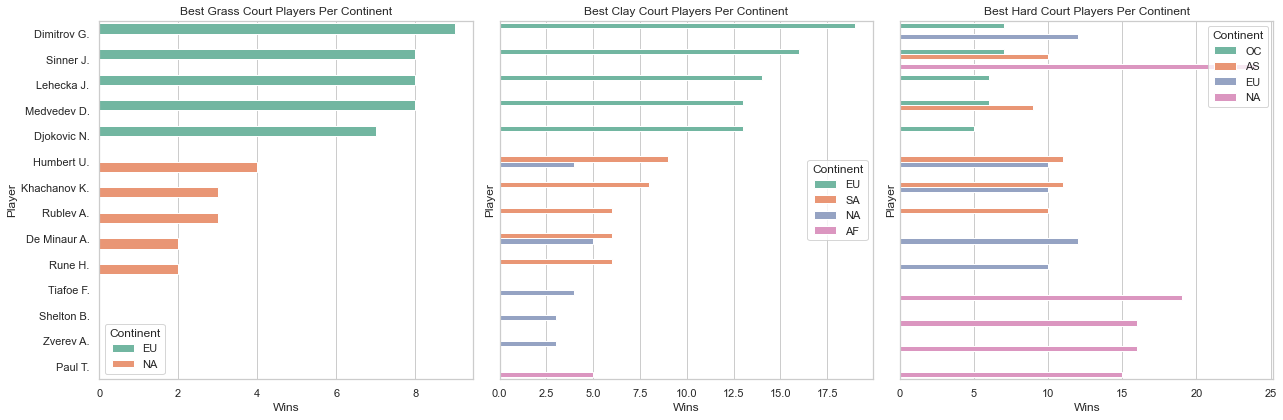

In [185]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create a figure with 3 subplots for Grass, Clay, and Hard
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define color palette
palette = "Set2"

def plot_by_surface(surface, df, index) : 
    sns.barplot(
    data=df,
    x="Wins",
    y="Winner",
    hue="Continent",
    palette=palette,
    ax=axes[index]
    )
    axes[index].set_title(f"Best {surface} Court Players Per Continent")
    axes[index].set_xlabel("Wins")
    axes[index].set_ylabel("Player")

plot_by_surface("Grass", grass_df, 0)
plot_by_surface("Clay", clay_df, 1)
plot_by_surface("Hard", hard_df, 2)

# Adjust layout
plt.tight_layout()
plt.show()